<a href="https://colab.research.google.com/github/Renan023/Desafio-DIO-Unimed-BH/blob/dev/projeto_dio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
files.upload()

In [ ]:
df=  pd.read_excel('AdventureWorks.xlsx')

In [ ]:
df.head()

,Data Emissão,Data Entregue,ID Loja,ID Produto,No. Venda,Marca,Fabricante,Produto,Classe,Cor,Quantidade,Preço Unitário,Valor Venda,Custo Unitário
0,2008-05-09,2008-05-29,199,384,200805093CS607,Adventure Works,Adventure Works,Adventure Works Laptop15.4W M1548 Red,Regular,Red,6,758.00,"4,548.00",348.58
1,2008-05-12,2008-05-17,306,384,200805123CS567,Adventure Works,Adventure Works,Adventure Works Laptop15.4W M1548 Red,Regular,Red,6,758.00,"4,548.00",348.58
2,2008-05-14,2008-05-20,306,384,200805143CS576,Adventure Works,Adventure Works,Adventure Works Laptop15.4W M1548 Red,Regular,Red,6,758.00,"4,548.00",348.58
3,2008-05-21,2008-05-27,306,384,200805213CS576,Adventure Works,Adventure Works,Adventure Works Laptop15.4W M1548 Red,Regular,Red,6,758.00,"4,548.00",348.58
4,2008-06-20,2008-06-27,306,384,200806203CS586,Adventure Works,Adventure Works,Adventure Works Laptop15.4W M1548 Red,Regular,Red,6,758.00,"4,548.00",348.58


In [ ]:
df['Custo total'] = df['Custo Unitário']*df['Quantidade']
df['Tempo de entrega'] = (df['Data Entregue']-df['Data Emissão']).dt.days

In [ ]:
df['Lucro']= df['Valor Venda']-df['Custo total']

In [ ]:
df['ID Loja'] = df['ID Loja'].astype('object')
df['ID Produto'] = df['ID Produto'].astype('object')

In [ ]:
df.dtypes

Data Emissão        datetime64[ns]
Data Entregue       datetime64[ns]
ID Loja                     object
ID Produto                  object
No. Venda                   object
Marca                       object
Fabricante                  object
Produto                     object
Classe                      object
Cor                         object
Quantidade                   int64
Preço Unitário             float64
Valor Venda                float64
Custo Unitário             float64
Custo total                float64
Tempo de entrega             int64
Lucro                      float64
dtype: object

In [ ]:
df.groupby([df['Data Emissão'].dt.year, 'Marca'])['Valor Venda'].sum()#Quero saber a venda das marcas que possuo

Data Emissão  Marca          
2008          Adventure Works             623,151.80
              Contoso                     130,897.97
              Fabrikam                  2,433,557.88
2009          Adventure Works             833,451.32
              Contoso                     319,498.58
              Fabrikam                  1,644,048.59
Name: Valor Venda, dtype: float64

In [ ]:
pd.options.display.float_format = '{:20,.2f}'.format#arrendondamento 

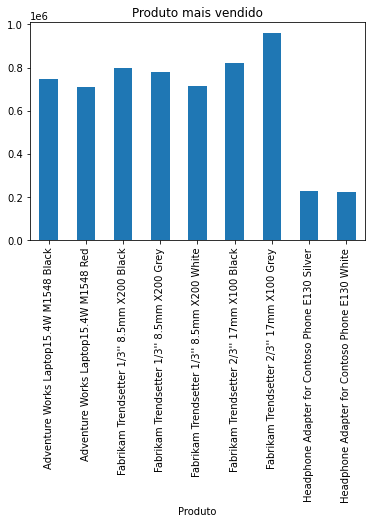

In [ ]:
df.groupby('Produto')['Valor Venda'].sum().plot.bar(title ='Produto mais vendido');

In [ ]:
Pvendido = df.groupby('Produto')['Valor Venda'].sum().sort_values(ascending=False).reset_index()
Pvendido

,Produto,Valor Venda
0,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"961,037.00"
1,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"821,396.80"
2,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"799,809.39"
3,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"781,334.20"
4,Adventure Works Laptop15.4W M1548 Black,"746,789.18"
5,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"714,029.08"
6,Adventure Works Laptop15.4W M1548 Red,"709,813.94"
7,Headphone Adapter for Contoso Phone E130 Silver,"226,591.38"
8,Headphone Adapter for Contoso Phone E130 White,"223,805.17"


In [ ]:
df.groupby([df['Data Emissão'].dt.month, 'Marca'])['Valor Venda'].sum()#Valores de quanto cada marca vendeu no mês no ano de 2008

Data Emissão  Marca          
1             Adventure Works              87,662.70
              Contoso                      17,670.31
              Fabrikam                    254,913.30
2             Adventure Works             215,931.46
              Contoso                      19,506.87
              Fabrikam                    331,874.39
3             Adventure Works             108,697.20
              Contoso                      14,781.20
              Fabrikam                    304,216.10
4             Adventure Works              45,305.66
              Contoso                       7,576.42
              Fabrikam                    235,488.38
5             Adventure Works             106,423.20
              Contoso                      20,859.12
              Fabrikam                    365,660.40
6             Adventure Works             158,043.00
              Contoso                      84,299.62
              Fabrikam                    597,637.20
7             Ad

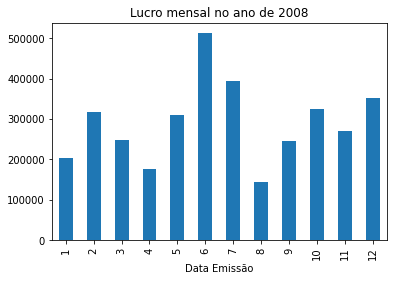

In [ ]:
df.groupby([df['Data Emissão'].dt.month])['Lucro'].sum().plot.bar(title = 'Lucro mensal no ano de 2008');

In [ ]:
df.groupby([df['Data Emissão'].dt.month])['Lucro'].sum()

Data Emissão
1              203,352.48
2              318,185.81
3              248,184.57
4              176,670.94
5              310,306.94
6              512,794.78
7              392,852.14
8              143,780.53
9              244,577.05
10             325,464.42
11             270,004.97
12             351,648.45
Name: Lucro, dtype: float64

In [ ]:
df['Tempo de entrega'].min()

4

In [ ]:
round(df['Tempo de entrega'].mean())

9

In [ ]:
df['Tempo de entrega'].max()

20